# Dealing With Categorical Data (EXP-2)

In [ ]:
class Solution:
    def isNumber(self, s: str) -> bool:
        # Helper function to check the validity of a substring
        def isValid(s):
            beforeE = None  # Stores characters before 'e' or 'E'
            afterE = None   # Stores characters after 'e' or 'E'

            afterEValid  = 0  # Flag to check if characters after 'e' are valid
            beforeEValid = 0  # Flag to check if characters before 'e' are valid

            # Iterate through the string to find 'e' or 'E'
            for index, char in enumerate(s):
                if char == 'e' or char == 'E':
                    beforeE = s[0:index]  # Characters before 'e'
                    afterE = s[index + 1:]  # Characters after 'e'
                    break

            if beforeE is None:
                beforeE = s  # If 'e' or 'E' is not present, consider the whole string
            if len(beforeE) == 0:
                return 0  # If there are no characters before 'e', it's not valid
            if afterE is None:
                afterEValid = 1  # If there are no characters after 'e', it's considered valid
            elif len(afterE) == 0:
                return 0  # If there are no characters after 'e', it's not valid
            else:
                try:
                    val = int(afterE)  # Attempt to convert the characters after 'e' to an integer
                    afterEValid = 1
                except:
                    afterEValid = 0  # If conversion to integer fails, it's not valid

            sign = None  # Stores the sign character (+ or -)
            dot  = 0     # Counts the number of decimal points
            ans = 0      # Stores the sum of digits before 'e'

            if beforeE[0] == '-' or beforeE[0] == '+':
                sign = beforeE[0]  # If there's a sign character, store it
                beforeE = beforeE[1:]  # Remove the sign character from consideration

            for val in beforeE:
                if val in ['+','-']:
                    return 0  # If there's a sign character other than the first position, it's not valid
                elif val in ['1','2','3','4','5','6','7','8','9','0']:
                    beforeEValid = 1  # If the character is a digit, it's valid
                    ans += int(val)  # Add the digit to the sum
                elif val == '.':
                    dot += 1
                    if dot > 1:
                        return 0  # If there are more than one decimal points, it's not valid
                else:
                    return 0  # If there's any other character, it's not valid

            # The result is valid if both parts (before 'e' and after 'e) are valid
            return beforeEValid and afterEValid

        # Call the isValid function and return its result
        return isValid(s)

        

In [ ]:
 pip install category_encoders


In [1]:
def remove_duplicates(nums):
    i, j = 0, 1
    while j < len(nums):
        if nums[i] != nums[j]:
            i += 1
            nums[i] = nums[j]
        j += 1
    return i + 1

# Example usage
nums = [1, 1, 2, 3, 3]
k = remove_duplicates(nums)

print(f"Number of unique elements: {k}")
print(f"Modified array: {nums[:k]}")

Number of unique elements: 3
Modified array: [1, 2, 3]


In [4]:
import pandas as pd
import category_encoders as ce

In [6]:
data=pd.DataFrame({
    'Name':['Hemanth', 'Sanjay', 'Prasanth', 'Koushik', 'A1', 'A2', 'A3'],
    'Gender':['M', 'M', 'M', 'M', 'F', 'F', 'F', ],
    'City':['TPG', 'RVPM', 'RVPM', 'NDD', 'HYD', 'VJY', 'VLVN']
})

In [7]:
data

,Name,Gender,City
0,Hemanth,M,TPG
1,Sanjay,M,RVPM
2,Prasanth,M,RVPM
3,Koushik,M,NDD
4,A1,F,HYD
5,A2,F,VJY
6,A3,F,VLVN


In [8]:
ch=ce.OneHotEncoder(cols=['Gender'])
d1=ch.fit_transform(data)
d1

,Name,Gender_1,Gender_2,City
0,Hemanth,1,0,TPG
1,Sanjay,1,0,RVPM
2,Prasanth,1,0,RVPM
3,Koushik,1,0,NDD
4,A1,0,1,HYD
5,A2,0,1,VJY
6,A3,0,1,VLVN


In [9]:
#get dummies function is used to convert the categorical data into numerical data
pd.get_dummies(data, prefix=['Gender'], columns=['Gender'])

,Name,City,Gender_F,Gender_M
0,Hemanth,TPG,0,1
1,Sanjay,RVPM,0,1
2,Prasanth,RVPM,0,1
3,Koushik,NDD,0,1
4,A1,HYD,1,0
5,A2,VJY,1,0
6,A3,VLVN,1,0


# How to split the data into training and testing

In [1]:
import pandas as pd
data=pd.read_csv("C:\python\cars.csv")

In [2]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
data

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [1]:
import pandas as pd
data=pd.read_excel("C:\python\cars.xlsx")

In [11]:
data

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1.0,790,99
1,Mitsubishi,Space Star,1.2,1160,95
2,Skoda,Citigo,1.0,929,95
3,Fiat,500,0.9,865,90
4,Mini,Cooper,1.5,1140,105
5,VW,Up!,1.0,929,105
6,Skoda,Fabia,1.4,1109,90
7,Mercedes,A-Class,1.5,1365,92
8,Ford,Fiesta,1.5,1112,98
9,Audi,A1,1.6,1150,99


In [12]:
x=data[['Weight', 'Volume']]

In [13]:
x

,Weight,Volume
0,790,1.0
1,1160,1.2
2,929,1.0
3,865,0.9
4,1140,1.5
5,929,1.0
6,1109,1.4
7,1365,1.5
8,1112,1.5
9,1150,1.6


In [7]:
import pandas as pd
data=pd.read_excel("C:\python\cars.xlsx")
x=data[['Weight', 'Volume']]
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [8]:
scalex=scale.fit_transform(x)

In [9]:
scalex

array([[-2.00228797, -1.50443334],
       [-1.17053295, -1.50443334],
       [ 0.09205922,  0.57616596],
       [-0.09344011,  0.1600461 ],
       [ 1.43842527,  0.57616596],
       [-0.07548856,  0.57616596],
       [ 0.15189771,  0.99228582],
       [-0.86535664, -1.08831348],
       [-0.80551815, -0.25607376],
       [-0.07548856, -1.50443334],
       [ 0.76225032,  0.99228582],
       [ 1.20505515,  0.99228582],
       [ 1.43842527,  0.99228582]])

In [1]:
import pandas as pd
data=pd.read_excel("C:\python\cars.xlsx")

In [2]:

x=data.iloc[:, [0,5]]

In [3]:
x

,Car,Price
0,Toyota,1110000
1,Skoda,550000
2,Mini,4120000
3,Skoda,751000
4,Mercedes,4580000
5,Ford,760000
6,Audi,1900000
7,Hyundai,746000
8,Suzuki,830000
9,Ford,1795000


In [4]:
y=data.iloc[:, 5]

In [5]:
y

0     1110000
1      550000
2     4120000
3      751000
4     4580000
5      760000
6     1900000
7      746000
8      830000
9     1795000
10    1000000
Name: Price, dtype: int64

In [2]:
#importing the requied packages
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=8)
x_train


,Car,Model,Volume,Weight,CO2
10,Honda,Civic,1.6,1252,94
0,Toyota,Aygo,1.0,790,99
2,Mini,Cooper,1.5,1140,105
5,Ford,Fiesta,1.5,1112,98
8,Suzuki,Swift,1.3,990,101
1,Skoda,Citigo,1.0,929,95
4,Mercedes,A-Class,1.5,1365,92
3,Skoda,Fabia,1.4,1109,90


In [8]:
y_train

,Price
10,1000000
0,1110000
2,4120000
5,760000
8,830000
1,550000
4,4580000
3,751000


In [9]:
x_test

,Car,Model,Volume,Weight,CO2
6,Audi,A1,1.6,1150,99
7,Hyundai,I20,1.1,980,99
9,Ford,Fiesta,1.0,1112,99


In [10]:
y_test

,Price
6,1900000
7,746000
9,1795000


In [11]:
y_train

,Price
10,1000000
0,1110000
2,4120000
5,760000
8,830000
1,550000
4,4580000
3,751000


In [12]:
import pandas as pd
heart_data=pd.read_csv("C:\python\heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Experiment -3 Finding Euclidean Dista

In [6]:
import pandas as pd
heart_data=pd.read_csv("C:\python\heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
d1=heart_data.loc[0]

In [10]:
d1

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

In [16]:
import numpy as np
import pandas as pd
import math as m
data=pd.read_csv("C:\python\heart.csv")
def euclidean_distance(x,y):
  return m.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
l=[]
b=np.array(data.iloc[0:1, 0:13])
b=np.squeeze(b)
for i in range(1,len(data),1):
    a=np.array(data.iloc[i:i+1,0:13],dtype="int")
    a=np.squeeze(a)
    l.append(euclidean_distance(b,a))
l.sort()
print('The first 5 similarities are : ')
for i in range (0,5):
    print(l[i])

The first 5 similarities are : 
10.568348972285122
12.613088440187836
13.404849868610986
16.10248428038357
16.114899937635357


In [28]:
arr = np.array([[3, 2, 4], [5, 0, 1]])
arr=np.sort(arr, axis=0)
arr

array([[3, 0, 1],
       [5, 2, 4]])

In [23]:
y=np.zeros([2,303])

In [24]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [25]:
y[0][0]=1

In [26]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [30]:
arr=np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [31]:
arr=np.sort(arr)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [32]:
arr=np.array([
    [7,2,65,56,34],
    [8,1,4,3,6]
])
arr=np.sort(arr)
arr

array([[ 2,  7, 34, 56, 65],
       [ 1,  3,  4,  6,  8]])

In [78]:
import numpy as np
import pandas as pd
import math as m
data=pd.read_csv("C:\python\heart.csv")
def euclidean_distance(x,y):
  return m.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
l=list()
b=np.array(data.iloc[0:1, 0:13])
b=np.squeeze(b)
for i in range(1,303,1):
    a=np.array(data.iloc[i:i+1,0:13],dtype="int")
    a=np.squeeze(a)
    l.append(euclidean_distance(b,a))
l.insert(0,0)
data['Euclidean_Distance']=l
data=data.sort_values('Euclidean_Distance')
print('First 5 Similarities to the First data in the Heart Data are')
data.iloc[1:6,:]

First 5 Similarities to the First data in the Heart Data are


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Euclidean_Distance
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1,10.568349
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0,12.613088
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0,13.404850
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,16.102484
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,16.114900


# class Similarity which has methods which performs necessary distance measures

In [2]:
import numpy as np
import pandas as pd
import math
from decimal import Decimal
class Similarity:
    def euclidean_distance(self,x,y):
        return math.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    def manhattan_distance(self,x,y):
        return sum(abs(a-b) for a,b in zip(x,y))
    def jaccard_similarity(self,x,y):
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)
    def nth_root(self,value, n_root):
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
    def minkowski_distance(self,x,y,p_value):
        return Similarity().nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
    def square_rooted(self,x):
        return round(math.sqrt(sum([a*a for a in x])),3)
    def cosine_similarity(self,x,y):
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = Similarity().square_rooted(x)*Similarity().square_rooted(y)
        return round(numerator/float(denominator),3)
def calc_similarities():
    s=Similarity()
    data=pd.read_csv("C:\python\heart.csv")
    b=np.array(data.iloc[0:1, 0:13])
    b=np.squeeze(b)
    while(True):
        print('1. Euclidean Distance\n2. Manhattan Distance\n3. Jacard Distane\n4. Minkowski Distance\n5. Cosine Similarity\n6. Exit')
        x=int(input('Enter Your choice:'))
        e_flag, m_flag, j_flag, mi_flag, c_flag=0, 0, 0, 0, 0
        match x:
            case 1:
                if e_flag==0:
                    e=list()
                    for i in range(1,303,1):
                        e_a=np.array(data.iloc[i:i+1,0:13],dtype="int")
                        e_a=np.squeeze(e_a)
                        e.append(s.euclidean_distance(b,e_a))
                    e.insert(0,0)
                    data['Euclidean_Distance']=e
                    data=data.sort_values('Euclidean_Distance')
                    print('First 5 Similarities to the First row data after fining Euclidean Distancein the Heart Data are')
                    print(data.iloc[1:6,:]) 
                    e_flag=1
                else:
                    data=data.sort_values('Euclidean_Distance')
                    print('First 5 Similarities to the First row data after fining Euclidean Distancein the Heart Data are')
                    print(data.iloc[1:6,:])  
                
            case 2:
                if m_flag==0:
                    m=list()
                    for i in range(1,303,1):
                        m_a=np.array(data.iloc[i:i+1,0:13],dtype="int")
                        m_a=np.squeeze(m_a)
                        m.append(s.manhattan_distance(b,m_a))
                    m.insert(0,0)
                    data['Manhattan_Distance']=m
                    data=data.sort_values('Manhattan_Distance')
                    print('First 5 Similarities to the First row data after fining Manhattan Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
                    m_flag=1
                else:
                    data=data.sort_values('Manhattan_Distance')
                    print('First 5 Similarities to the First row data after fining Manhattan Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
            case 3:
                if j_flag==0:
                    j=list()
                    for i in range(1,303,1):
                        j_a=np.array(data.iloc[i:i+1,0:13],dtype="int")
                        j_a=np.squeeze(j_a)
                        j.append(s.jaccard_similarity(b,j_a))
                    j.insert(0,0)
                    data['Jaccard_Similarity']=j
                    data=data.sort_values('Jaccard_Similarity')
                    print('First 5 Similarities to the First row data after fining Jaccard Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
                    j_flag=1
                else:
                    data=data.sort_values('Jaccard_Similarity')
                    print('First 5 Similarities to the First row data after fining Jaccard Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
            case 4:
                if mi_flag==0:
                    mi=list()
                    p=int(input('Enter Power value: '))
                    for i in range(1,303,1):
                        mi_a=np.array(data.iloc[i:i+1,0:13],dtype="int")
                        mi_a=np.squeeze(mi_a)
                        mi.append(s.minkowski_distance(b,mi_a,p))
                    mi.insert(0,0)
                    data['Minkowski_Distance']=mi
                    data=data.sort_values('Minkowski_Distance')
                    print('First 5 Similarities to the First row data after fining Minkowski Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
                    mi_flag=1
                else:
                    data=data.sort_values('Minkowski_Distance')
                    print('First 5 Similarities to the First row data after fining Minkowski Distance in the Heart Data are')
                    print(data.iloc[1:6,:])
            case 5:
                if c_flag==0:
                    c=list()
                    for i in range(1,303,1):
                        c_a=np.array(data.iloc[i:i+1,0:13],dtype="int")
                        c_a=np.squeeze(c_a)
                        c.append(s.cosine_similarity(b,c_a))
                    c.insert(0,0)
                    data['Cosine_Similarity']=c
                    data=data.sort_values('Cosine_Similarity')
                    print('First 5 Similarities to the First row data after fining Cosine Similarity in the Heart Data are')
                    print(data.iloc[1:6,:])
                    c_flag=1
                else:
                    data=data.sort_values('Cosine_Similarity')
                    print('First 5 Similarities to the First row data after fining Cosine Similarity in the Heart Data are')
                    print(data.iloc[1:6,:])
            case 6:
                break
calc_similarities()

1. Euclidean Distance
2. Manhattan Distance
3. Jacard Distane
4. Minkowski Distance
5. Cosine Similarity
6. Exit
Enter Your choice:6


In [ ]:
import numpy as np

In [1]:
import pandas as pd
data=pd.read_csv("C:\python\heart.csv")

In [2]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Generating correlation matrix and representing it

In [1]:
import pandas as pd
data=pd.read_csv("C:\python\car data.csv")

In [2]:
+data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace=True)

In [5]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [6]:
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

In [7]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [8]:
data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [9]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
corr_matrix=data.corr() # finding the relationship between the attributes inorder to konow strong or weak

C:\Users\hp\AppData\Local\Temp\ipykernel_25672\3858239493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


In [12]:
corr_matrix

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [15]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

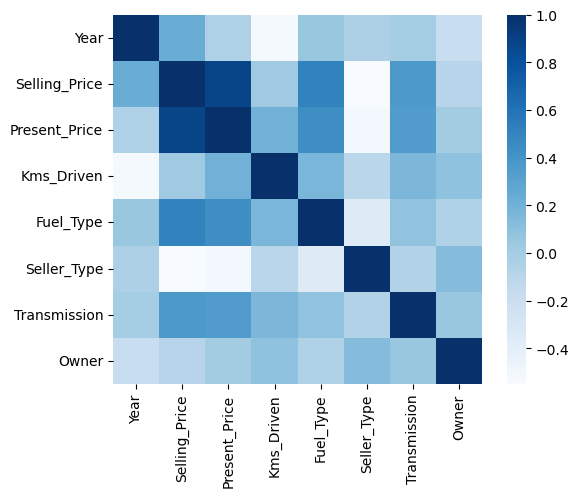

In [18]:
a=sns.heatmap(corr_matrix, square=True, cmap='Blues')

In [19]:
plt.show()

# Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
x=data.drop(['Car_Name', 'Selling_Price'], axis=1)

In [24]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [25]:
y=data['Selling_Price']

In [26]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
print(x_train)
print(x_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
184  2008          0.750       26000          0            1             0   
132  2017          0.950        3500          0            1             0   
194  2008          0.787       50000          0            1             0   
75   2015          6.800       36000          0            0             0   
111  2016          1.500        8700          0            1             0   
..    ...            ...         ...        ...          ...           ...   
188  2013          0.570       18000          0            1             0   
71   2011         12.480       45000          1            0             0   
106  2014          3.450       16500          0            1             0   
270  2011         10.000       69341          0            0             0   
102  2017          1.780        4000          0            1             0   

     Owner  
184      1  
132      0  
194      0  
75       0 

In [31]:
y_train

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64

In [32]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [33]:
lin_reg_model=LinearRegression()

In [34]:
from sklearn import metrics

In [35]:
lin_reg_model.fit(x_train, y_train) #fitting both trainging sets 

LinearRegression()

In [36]:
training_data_prediction=lin_reg_model.predict(x_train) #predicting the training the data set

In [42]:
len(training_data_prediction)

240

In [1]:
train_r2_error=metrics.r2_score(y_train, training_data_prediction) #finding the r-squared error for training data

NameError: name 'metrics' is not defined

In [39]:
']=train_r2_error

0.8839793496750793

In [43]:
testing_data_prediction=lin_reg_model.predict(x_test) # predicting the testing data set

In [52]:
testing_data_prediction

array([ 2.96670467,  8.3025584 ,  6.05620758, -1.46814968,  9.25713882,
        7.032306  ,  1.35164871,  0.8268692 ,  1.37173108,  7.10742891,
        8.74382695,  0.58613312,  8.50347194,  3.42803571,  6.50183791,
        3.08701389,  0.46323861, 10.8959559 ,  1.76487652,  2.36736645,
        0.37538646,  7.73247978,  6.2075281 ,  2.64722707,  0.78232086,
        3.72073841,  5.33393873,  2.83824054,  2.16090172,  1.77220708,
        0.37859447,  8.79078642, -0.7007019 ,  2.2988819 ,  8.21516023,
        4.54037167,  7.35322104,  7.6823757 ,  2.91768184,  8.08080852,
        3.99669454,  4.34672417,  4.36388106,  0.61018923,  6.94478948,
        0.47281585,  7.41596672, 11.44059317,  3.14822313,  4.95097368,
        6.86250813,  2.19862524, 20.53946595, 16.79146986,  7.13952545,
        9.830903  ,  4.49886186,  8.62078376,  1.810855  ,  7.67299866,
        0.21098592])

In [46]:
test_r2_error=metrics.r2_score(y_test, testing_data_prediction) #finding the r- squared error for test data

In [47]:
test_r2_error

0.8468053957654699

Text(0.5, 1.0, 'Actual Price VS Predicted Price')

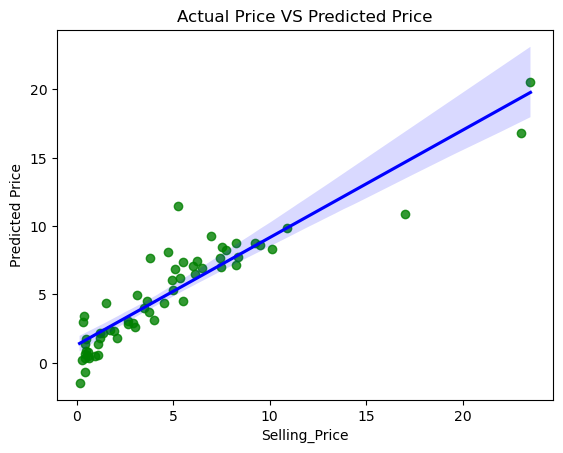

In [64]:
sns.regplot(x=y_test, y=testing_data_prediction, scatter_kws={'color':'green'}, line_kws={'color': 'blue'})
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')

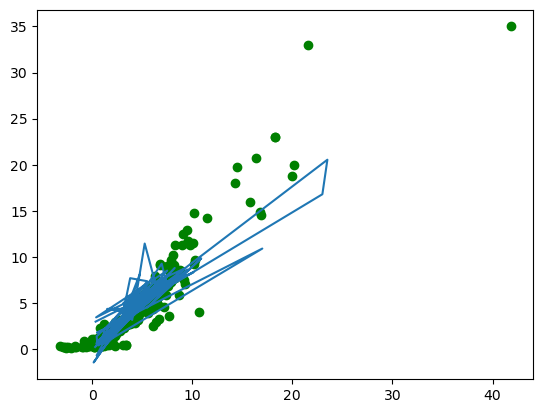

In [56]:
plt.scatter(training_data_prediction, y_train, color='green')
plt.plot(y_test, testing_data_prediction)
plt.show()

In [ ]:
plt.scatter()

# Naive Bayes Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
glass=pd.read_csv("C:\python\glass.csv")
nb = GaussianNB()
#Create variable x and y.
x = glass.drop(columns=['Type'])
y = glass['Type']
#Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)
#Training the model
nb.fit(x_train, y_train)
#Predict testing set
y_pred = nb.predict(x_test)
#Check performance of model
print(accuracy_score(y_test, y_pred))

0.5538461538461539


In [7]:
from sklearn.datasets import load_iris

In [8]:
data=load_iris()

In [9]:
print(data.head())

AttributeError: head

In [10]:
x=data.data

In [11]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y=data.target

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
print(len(data))

8


# Agglomerative Clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [8]:
x=data.iloc[:, [3, 4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
y=agg_hc.fit_predict(x)
y

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


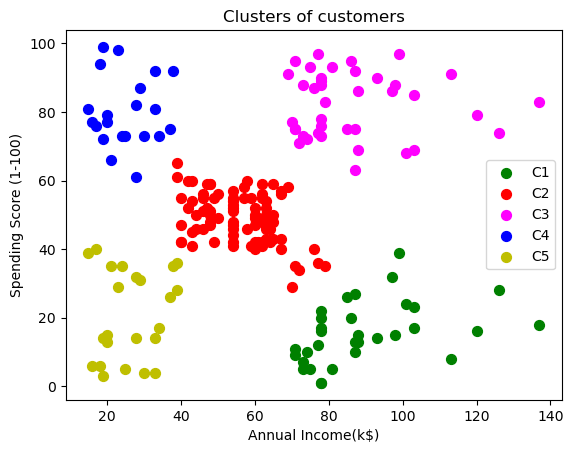

In [13]:
data=pd.read_csv("C:\python\Mall_Customers.csv")
x=data.iloc[:, [3, 4]].values
agg_hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y=agg_hc.fit_predict(x)
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='g',label='C1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='r',label='C2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='magenta',label='C3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='b',label='C4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='y',label='C5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
data.isna()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


# Experiment-5 Decision Tree Classifier

In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
data=pd.read_csv('C:\python\iris.csv')

In [12]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x=data.drop(columns=['variety'])

In [14]:
y=data['variety']

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=40)

In [16]:
dfc=DecisionTreeClassifier()

In [17]:
dfc.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred=dfc.predict(x_test)

In [19]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [20]:
y_test==y_pred

38     True
66     True
115    True
117    True
89     True
136    True
68     True
94     True
84     True
28     True
90     True
11     True
40     True
126    True
79     True
144    True
123    True
124    True
76     True
59     True
132    True
105    True
53     True
17     True
64     True
18     True
13     True
116    True
9      True
81     True
Name: variety, dtype: bool

In [21]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [22]:
ac=accuracy_score(y_test, y_pred)
ac

1.0

# Experiment 10 - DBSCAN

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('c:\python\Mall_Customers.csv')

In [3]:
x=data.iloc[:, 2:5].values

In [4]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [5]:
from sklearn.neighbors import NearestNeighbors 
neighb=NearestNeighbors(n_neighbors=3)
nbrs=neighb.fit(x)
distances,indices=nbrs.kneighbors(x)
distances

array([[ 0.        , 12.20655562, 17.54992877],
       [ 0.        ,  4.58257569,  5.47722558],
       [ 0.        , 15.13274595, 18.81488772],
       [ 0.        ,  1.73205081,  4.12310563],
       [ 0.        ,  7.54983444,  9.48683298],
       [ 0.        ,  1.73205081,  3.74165739],
       [ 0.        ,  7.54983444, 13.07669683],
       [ 0.        , 13.03840481, 13.03840481],
       [ 0.        , 11.40175425, 11.74734012],
       [ 0.        ,  6.164414  ,  7.14142843],
       [ 0.        ,  9.11043358, 11.40175425],
       [ 0.        ,  4.12310563, 13.03840481],
       [ 0.        ,  9.        ,  9.11043358],
       [ 0.        ,  2.82842712,  3.74165739],
       [ 0.        ,  7.54983444, 13.03840481],
       [ 0.        ,  2.82842712,  4.24264069],
       [ 0.        ,  3.        ,  7.54983444],
       [ 0.        ,  9.11043358, 10.95445115],
       [ 0.        ,  9.11043358, 13.56465997],
       [ 0.        ,  4.12310563, 13.60147051],
       [ 0.        ,  3.        ,  8.124

In [6]:
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,  14],
       [  3,   5,  13],
       [  4,  16,  20],
       [  5,   3,  13],
       [  6,  14,  22],
       [  7,  29,  11],
       [  8,  10,  30],
       [  9,  23,  21],
       [ 10,  12,   8],
       [ 11,  19,   7],
       [ 12,  24,  10],
       [ 13,  15,   5],
       [ 14,   6,  22],
       [ 15,  13,   5],
       [ 16,  20,   4],
       [ 17,  21,   5],
       [ 18,  26,  28],
       [ 19,  11,   7],
       [ 20,  16,  28],
       [ 21,  13,  23],
       [ 22,  32,  24],
       [ 23,  21,   9],
       [ 24,  34,  12],
       [ 25,  29,  35],
       [ 26,  28,  18],
       [ 27,  43,  23],
       [ 28,  26,  20],
       [ 29,  35,  25],
       [ 30,  32,   8],
       [ 31,  21,  39],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  24,  36],
       [ 35,  39,  29],
       [ 36,  34,  38],
       [ 37,  23,  31],
       [ 38,  28,  36],
       [ 39,  35,  31],
       [ 40,  57,  67],
       [ 41,  33

In [9]:
import numpy as np
distances = np.sort(distances, axis = 0)

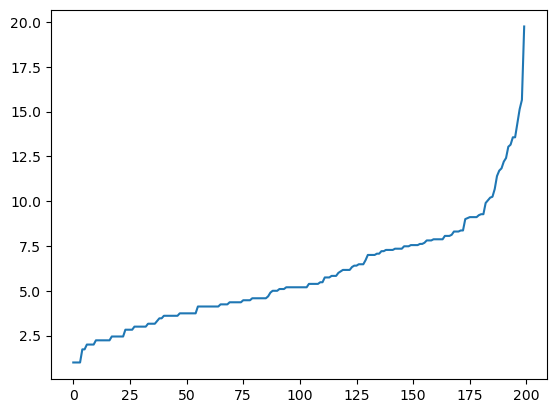

In [10]:
distances=distances[:, 1]
import matplotlib.pyplot as plt
plt.plot(distances)
plt.r
plt.show()

In [1]:
from sklearn import KMeans

ImportError: cannot import name 'KMeans' from 'sklearn' (C:\Users\hp\anaconda3\Lib\site-packages\sklearn\__init__.py)

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
data

NameError: name 'data' is not defined

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('c:\python\Mall_Customers.csv')

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
x=data.iloc[:, 3:5].values

In [10]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
wcss=[]
import warnings
warnings.filterwarnings(action='ignore',module='sklearn')
for i in range(1, 10):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25044.967764018926,
 21884.744095710274]

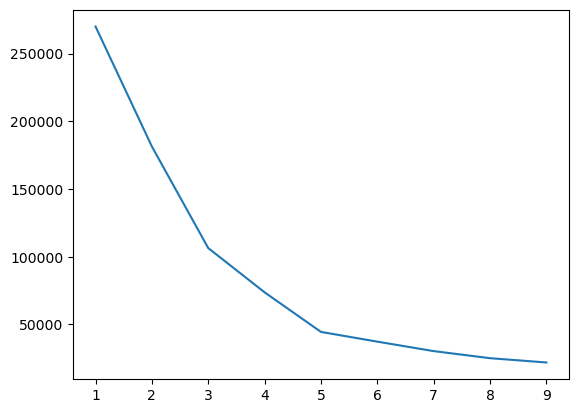

In [15]:
import matplotlib.pyplot as plt
y=range(1, 10) 
plt.plot(y, wcss)
plt.show()

# Apriori Principle

In [16]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=9d79b1359ee92825a6500f8e402123c9c8ae450040252691837d18beea36b3c9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [17]:
from apyori import apriori
import pandas as d
import numpy as np

In [26]:
data=pd.read_csv("C:\python\Groceries_dataset.csv")
records=[]
for i in range(0, 21):
    records.append([str(data[i, u].values for u in range(0,6)) ])
#print(records)
association_rule=apriori(records, min_support=0.5, min_confidence=0.7, min_lift=1.2, min_length=42)
print('----------------')
association_result=list(association_rule)
print('----------------')
print(len(association_result))
print('----------------')
print(association_result)
print('----------------')
print(association_rule)

----------------
----------------
0
----------------
[]
----------------
<generator object apriori at 0x0000023752AE78A0>


In [24]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [27]:
records

[['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> at 0x0000023753292F80>'],
 ['<generator object <genexpr> 